# Pearson's correlation coefficient between Replicates

Pearson's correlation coefficient, also known as the "product-moment correlation coefficient" or simply "Pearson's ρ", measures the degree of linear relationship between two variables on a metric scale. This coefficient, typically denoted by ρ, ranges from -1 to 1. A correlation coefficient of 0.8 indicates a **fairly strong positive relationship**.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Carregar dados CSV
dataframe = pd.read_csv('Data/AreasRelatorioNorm.csv')

# Calculate Pearson correlation between replicates
corr_ctrl = dataframe[['CTRL_A549_1', 'CTRL_A549_2','CTRL_A549_3']].corr(method='pearson')
corr_saha = dataframe[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].corr(method='pearson')
corr_tgfb = dataframe[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].corr(method='pearson')

print('Correlation between CTRL_A549 replicates:\n', corr_ctrl)
print('Correlation between SAHA_A549 replicates:\n', corr_saha)
print('Correlation between TGFB_A549 replicates:\n', corr_tgfb)

Correlation between CTRL_A549 replicates:
              CTRL_A549_1  CTRL_A549_2  CTRL_A549_3
CTRL_A549_1     1.000000     0.962728     0.915443
CTRL_A549_2     0.962728     1.000000     0.987293
CTRL_A549_3     0.915443     0.987293     1.000000
Correlation between SAHA_A549 replicates:
              SAHA_A549_1  SAHA_A549_2  SAHA_A549_3
SAHA_A549_1     1.000000     0.999008     0.999036
SAHA_A549_2     0.999008     1.000000     0.998976
SAHA_A549_3     0.999036     0.998976     1.000000
Correlation between TGFB_A549 replicates:
              TGFB_A549_1  TGFB_A549_2  TGFB_A549_3
TGFB_A549_1     1.000000     0.999300     0.998472
TGFB_A549_2     0.999300     1.000000     0.999245
TGFB_A549_3     0.998472     0.999245     1.000000


# QQ-plot 

A QQ-plot (Quantile-Quantile plot) is a graphical tool used to assess whether a dataset follows a specific theoretical distribution, typically a normal distribution. The plot compares the quantiles of the observed data to the quantiles of the chosen theoretical distribution.

- Quantiles: Quantiles divide the data into equal-sized intervals. For example, the median is the 0.5 quantile, meaning 50% of the data is below it.
- Observed vs. Theoretical Quantiles: In a QQ-plot, the observed quantiles of the dataset are plotted against the theoretical - quantiles from a specified distribution (often normal). The plot uses two axes:
- The x-axis represents the theoretical quantiles.
- The y-axis represents the observed quantiles.

<class 'numpy.ndarray'>
[3.0436516  3.03046641 2.94284644 5.38263588 5.2935625  5.21307024
 3.86006644 3.93714846 3.53742442 1.07127127]


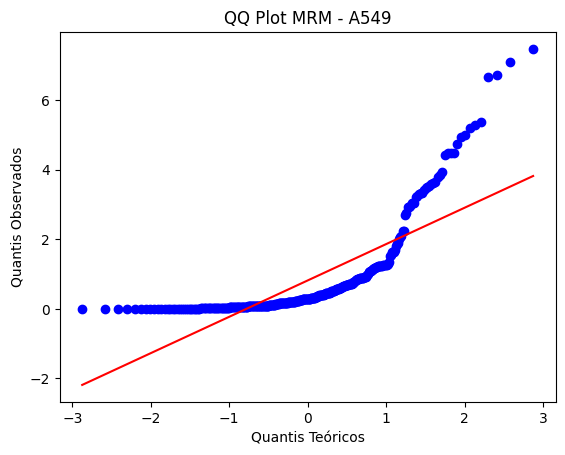

In [9]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Carregar dados CSV
df = pd.read_csv('Data/AreasRelatorioNorm.csv')

# Converter todos os dados para valores numéricos, se possível
df = df.apply(pd.to_numeric, errors='coerce')

# Transformar o DataFrame em um array unidimensional
dados = df.values.flatten()

# Remover valores nulos
dados = dados[~np.isnan(dados)]

# Verificar o tipo e conteúdo dos dados
print(type(dados))
print(dados[:10])

# Criar o Q-Q Plot com os dados originais
stats.probplot(dados, dist="norm", plot=plt)

# Adicionar título e rótulos
plt.title('QQ Plot MRM - A549')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Observados')

# Mostrar o gráfico
plt.show()

# QQ-plot with log scale normalization

*Logarithmic transformations are a tool in the world of statistical analysis. They are often used to transform data that presents asymmetry or other irregularities, making it easier to analyze, visualize and interpret the results.*

'Asymmetric data can make it difficult to interpret results and adapt models, as many statistical techniques assume that data follows a normal distribution. Logarithmic transformations can help normalize positive skewed data, making it more symmetric and easier to analyze'. *READ https://medium.com/@victor.h.f.francheto/explorando-o-poder-dos-logaritmos-na-análise-estatística-b0b609180cfc*

<class 'numpy.ndarray'>
[1.11305798 1.10871654 1.07937729 1.68317819 1.66649146 1.65116898
 1.35068439 1.37045672 1.2633989  0.06884605]


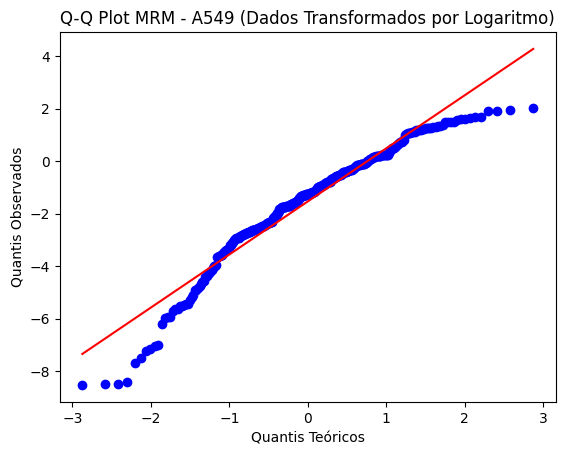

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Carregar dados CSV
df = pd.read_csv('Data/AreasRelatorioNorm.csv')

# Converter todos os dados para valores numéricos, se possível
df = df.apply(pd.to_numeric, errors='coerce')

# Transformar o DataFrame em um array unidimensional
dados = df.values.flatten()

# Remover valores nulos
dados = dados[~np.isnan(dados)]

# Filtrar valores não positivos (necessário para aplicar logaritmo)
dados = dados[dados > 0]

# Transformar os dados em logaritmo
dados_log = np.log(dados)

# Verificar o tipo e conteúdo dos dados transformados
print(type(dados_log))
print(dados_log[:10])

# Criar o Q-Q Plot com os dados transformados
stats.probplot(dados_log, dist="norm", plot=plt)

# Adicionar título e rótulos
plt.title('Q-Q Plot MRM - A549 (Dados Transformados por Logaritmo)')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Observados')

# Mostrar o gráfico
plt.show()